In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn import tree
import pydotplus
from IPython.display import Image

In [2]:
credit_df=pd.read_csv('../Resources/credit_record.csv', index_col="ID")
application_df=pd.read_csv('../Resources/application_record.csv', index_col="ID")

In [3]:
application_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,
5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_df.head()

,MONTHS_BALANCE,STATUS
ID,,
5001711,0,X
5001711,-1,0
5001711,-2,0
5001711,-3,0
5001712,0,C


In [5]:
credit_grouped=pd.get_dummies(data=credit_df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(credit_df['STATUS'].unique().tolist())].sum()
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'pastdue_60_89',
                       '3':'pastdue_90_119',
                       '4':'pastdue_120_149',
                       '5':'pastdue_over_150',
                       'C':'paid_off',
                       'X':'no_loan',
                      })

credit_grouped['number_of_months']=credit_df.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months
ID,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4
5001712,10,0,0,0,0,0,9,0,19
5001713,0,0,0,0,0,0,0,22,22
5001714,0,0,0,0,0,0,0,15,15
5001715,0,0,0,0,0,0,0,60,60
...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18
5150483,0,0,0,0,0,0,0,18,18
5150484,12,0,0,0,0,0,1,0,13


In [6]:
credit_grouped['pastdue_60_89'].value_counts()

pastdue_60_89
0    45388
1      435
2      100
3       39
4       12
5        4
6        3
8        2
7        2
Name: count, dtype: int64

In [7]:
credit_grouped['pastdue_30_59'].value_counts()

pastdue_30_59
0     40784
1      2888
2      1110
3       470
4       268
5       143
6        94
7        63
8        53
9        30
10       23
13       17
11       13
12        8
16        6
15        4
14        2
19        2
18        1
31        1
21        1
27        1
38        1
22        1
17        1
Name: count, dtype: int64

In [8]:
credit_grouped['customer_status'] = credit_grouped['pastdue_30_59'].apply(lambda x: 1 if x > 0 else 0)
credit_grouped

,pastdue_1_29,pastdue_30_59,pastdue_60_89,pastdue_90_119,pastdue_120_149,pastdue_over_150,paid_off,no_loan,number_of_months,customer_status
ID,,,,,,,,,,
5001711,3,0,0,0,0,0,0,1,4,0
5001712,10,0,0,0,0,0,9,0,19,0
5001713,0,0,0,0,0,0,0,22,22,0
5001714,0,0,0,0,0,0,0,15,15,0
5001715,0,0,0,0,0,0,0,60,60,0
...,...,...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0,18,0
5150483,0,0,0,0,0,0,0,18,18,0
5150484,12,0,0,0,0,0,1,0,13,0


In [9]:
merged_df = pd.merge(credit_grouped[["customer_status"]], application_df, how='inner', left_index=True, right_index=True)

In [10]:
merged_df.head()

,customer_status,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,,,,,,,,,,,,,,,,,,
5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5008809,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [11]:
merged_df['AGE'] = round(-merged_df["DAYS_BIRTH"]/365.25)
merged_df.drop(columns=['DAYS_BIRTH'], inplace=True)

In [12]:
merged_df['AGE'].unique()

array([33., 59., 52., 62., 46., 49., 29., 51., 27., 30., 35., 32., 56.,
       43., 44., 34., 55., 47., 42., 37., 28., 61., 57., 45., 54., 40.,
       39., 48., 24., 21., 36., 26., 50., 63., 58., 41., 60., 31., 38.,
       53., 22., 64., 23., 25., 65., 67., 66., 69., 68.])

In [13]:
merged_df['YEARS_EMPLOYED'] = round(-merged_df["DAYS_EMPLOYED"]/365.25)
merged_df.drop(columns=['DAYS_EMPLOYED'], inplace=True)

In [14]:
merged_df['YEARS_EMPLOYED'].unique()

array([   12.,     3.,     8., -1000.,     2.,     4.,     6.,     9.,
          19.,    15.,     5.,    13.,     7.,    17.,    30.,    16.,
          11.,     1.,    10.,    24.,    14.,    25.,     0.,    20.,
          27.,    18.,    21.,    23.,    22.,    28.,    39.,    32.,
          33.,    37.,    26.,    38.,    31.,    29.,    35.,    34.,
          41.,    40.,    36.,    42.,    43.])

In [15]:
#For years employed, negative values mean applicant doesn't work, so we convert negative values to 0 as well
merged_df.loc[(merged_df['YEARS_EMPLOYED'] < 0), 'YEARS_EMPLOYED'] = 0

In [16]:
for column in merged_df.columns:
    value_counts_result = merged_df[column].value_counts()
    print(f"\nValue counts for column '{column}':\n{value_counts_result}")



Value counts for column 'customer_status':
customer_status
0    32308
1     4149
Name: count, dtype: int64

Value counts for column 'CODE_GENDER':
CODE_GENDER
F    24430
M    12027
Name: count, dtype: int64

Value counts for column 'FLAG_OWN_CAR':
FLAG_OWN_CAR
N    22614
Y    13843
Name: count, dtype: int64

Value counts for column 'FLAG_OWN_REALTY':
FLAG_OWN_REALTY
Y    24506
N    11951
Name: count, dtype: int64

Value counts for column 'CNT_CHILDREN':
CNT_CHILDREN
0     25201
1      7492
2      3256
3       419
4        63
5        20
14        3
7         2
19        1
Name: count, dtype: int64

Value counts for column 'AMT_INCOME_TOTAL':
AMT_INCOME_TOTAL
135000.0    4309
180000.0    3097
157500.0    3089
112500.0    2956
225000.0    2926
            ... 
147150.0       1
177750.0       1
134995.5       1
31950.0        1
74061.0        1
Name: count, Length: 265, dtype: int64

Value counts for column 'NAME_INCOME_TYPE':
NAME_INCOME_TYPE
Working                 18819
Commercial ass

In [17]:
merged_df.isnull().sum()

customer_status            0
CODE_GENDER                0
FLAG_OWN_CAR               0
FLAG_OWN_REALTY            0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
NAME_HOUSING_TYPE          0
FLAG_MOBIL                 0
FLAG_WORK_PHONE            0
FLAG_PHONE                 0
FLAG_EMAIL                 0
OCCUPATION_TYPE        11323
CNT_FAM_MEMBERS            0
AGE                        0
YEARS_EMPLOYED             0
dtype: int64

In [18]:
merged_df.drop(columns=["FLAG_MOBIL", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL", "CNT_FAM_MEMBERS"], inplace=True)

In [19]:
merged_df["YEARS_EMPLOYED"].unique()

array([12.,  3.,  8.,  0.,  2.,  4.,  6.,  9., 19., 15.,  5., 13.,  7.,
       17., 30., 16., 11.,  1., 10., 24., 14., 25., 20., 27., 18., 21.,
       23., 22., 28., 39., 32., 33., 37., 26., 38., 31., 29., 35., 34.,
       41., 40., 36., 42., 43.])

In [20]:
merged_df["OCCUPATION_TYPE"].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [21]:
merged_df.dtypes

customer_status          int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
OCCUPATION_TYPE         object
AGE                    float64
YEARS_EMPLOYED         float64
dtype: object

In [22]:
occupation_df = merged_df.dropna(subset=["OCCUPATION_TYPE"])

In [23]:
nan_occupation_df = merged_df[merged_df['OCCUPATION_TYPE'].isnull()]

In [24]:
# Separate the rows with and without NaN values in the 'OCCUPATION_TYPE' column
df_nan = merged_df[merged_df['OCCUPATION_TYPE'].isna()]
df_not_nan = merged_df.dropna(subset=['OCCUPATION_TYPE'])

# Encode categorical columns
label_encoder = LabelEncoder()
encoded_labels = {}
for column in df_not_nan.select_dtypes(include=['object']).columns:
    df_not_nan[column] = label_encoder.fit_transform(df_not_nan[column])
    encoded_labels[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Identify features (X) and target variable (y)
X_ot = df_not_nan.drop(['OCCUPATION_TYPE'], axis=1)
y_ot = label_encoder.fit_transform(df_not_nan['OCCUPATION_TYPE'])  # Encode target variable

# Split the data into training and testing sets
X_train_ot, X_test_ot, y_train_ot, y_test_ot = train_test_split(X_ot, y_ot, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_ot, y_train_ot)

# Evaluate the model on the test set
y_true = y_test_ot  # True labels from the test set
y_pred = rf_classifier.predict(X_test_ot)  # Predicted labels on the test set


# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Print accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_14243/4263753290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan[column] = label_encoder.fit_transform(df_not_nan[column])
/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_14243/4263753290.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_nan[column] = label_encoder.fit_transform(df_not_nan[column])
/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_14243/4263753290.py:9: SettingWithCopyWarning: 
A value is 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       270
           1       0.94      0.92      0.93       118
           2       0.94      0.83      0.88       136
           3       0.92      0.91      0.92       736
           4       0.89      0.92      0.90       431
           5       0.92      0.92      0.92        13
           6       0.95      0.88      0.91       293
           7       1.00      0.90      0.95        10
           8       0.90      0.93      0.91      1219
           9       1.00      0.94      0.97        33
          10       0.91      0.91      0.91       591
          11       0.93      0.95      0.94       243
          12       0.98      0.83      0.90        76
          13       0.93      1.00      0.96        13
          14       0.86      0.92      0.89       671
          15       1.00      0.79      0.88        24
          16       0.93      0.84      0.89       116
    

In [25]:
# Identify rows with NaN values in the target variable
X_nan = df_nan.drop(['OCCUPATION_TYPE'], axis=1)

# Encode categorical columns in the NaN rows
for column in X_nan.select_dtypes(include=['object']).columns:
    # Check if label encoder has seen the label before transforming
    X_nan[column] = X_nan[column].map(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)

# Predict the missing values
predicted_occupations = rf_classifier.predict(X_nan)

# Reverse label encoding using the mapping dictionary
predicted_occupations_original = [encoded_labels['OCCUPATION_TYPE'].get(label, label) for label in predicted_occupations]

predicted_occupations_original = [key for label in predicted_occupations for key, value in encoded_labels['OCCUPATION_TYPE'].items() if value == label]

# Fill NaN values with predicted values
merged_df.loc[merged_df['OCCUPATION_TYPE'].isna(), 'OCCUPATION_TYPE'] = predicted_occupations_original

/var/folders/9z/mjxxydhd64v1_mckv3vlz0h00000gn/T/ipykernel_14243/1842177641.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  X_nan[column] = X_nan[column].map(lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1)


In [26]:
merged_df

,customer_status,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,AGE,YEARS_EMPLOYED
ID,,,,,,,,,,,,,
5008804,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Managers,33.0,12.0
5008805,1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,Managers,33.0,12.0
5008806,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,Security staff,59.0,3.0
5008808,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,52.0,8.0
5008809,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,52.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,Core staff,30.0,5.0
5150483,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,Core staff,30.0,5.0
5150484,0,F,Y,Y,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,Core staff,30.0,5.0


In [27]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

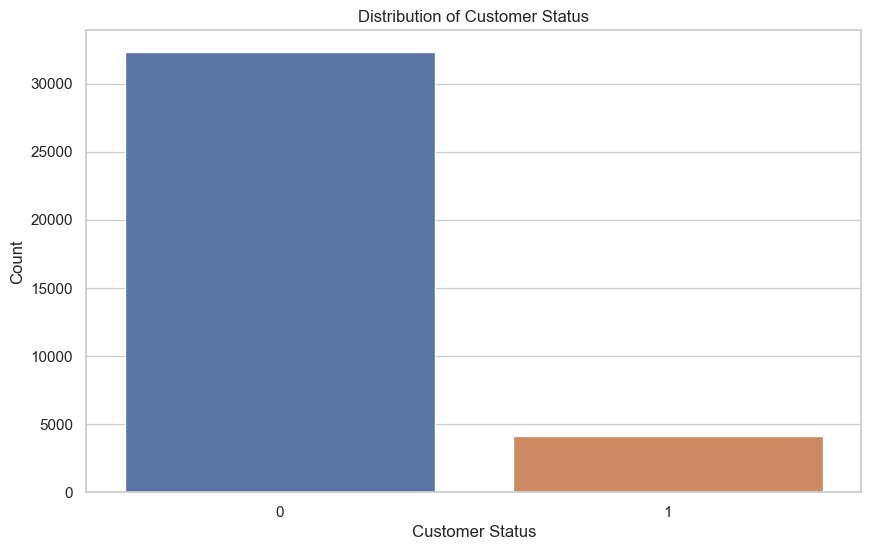

In [28]:
# Plotting the distribution of the target variable 'customer_status'
plt.figure(figsize=(10, 6))
sns.countplot(x='customer_status', data=merged_df)
plt.title('Distribution of Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.show()

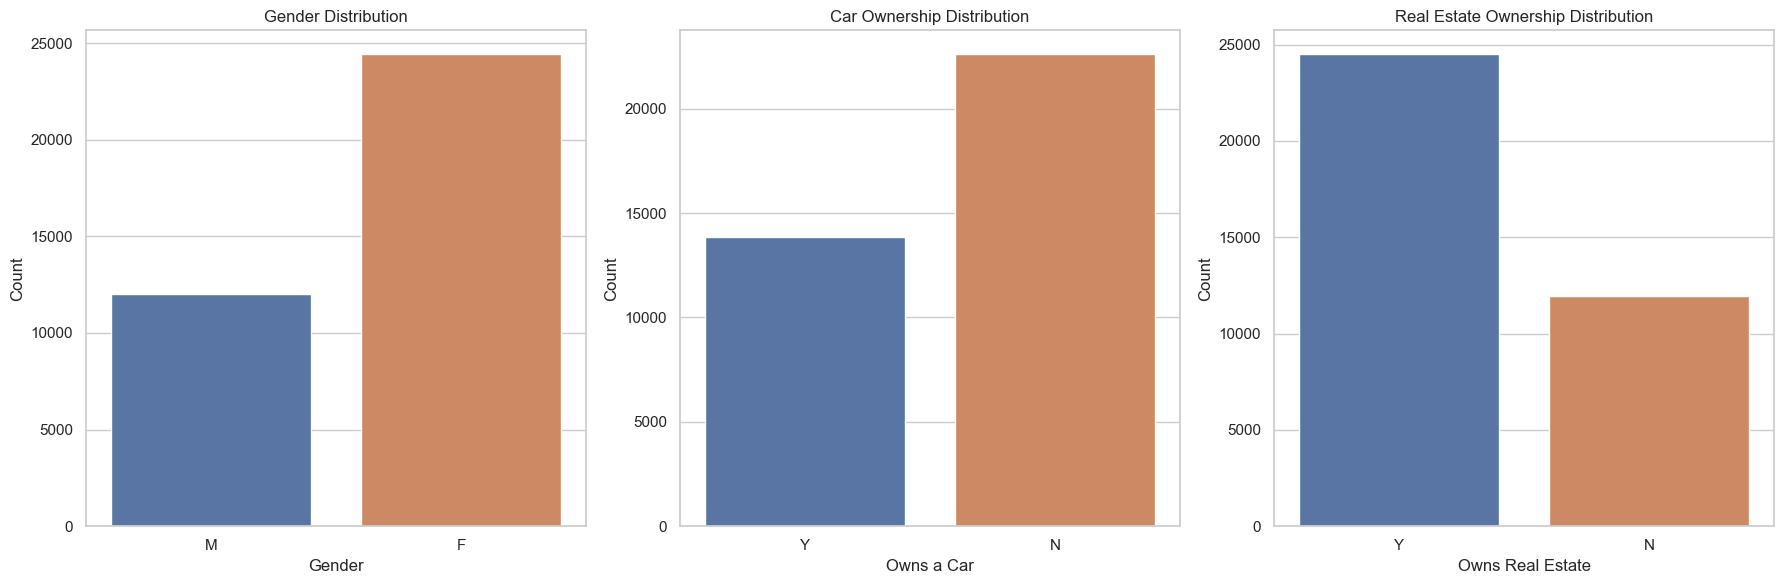

In [29]:
# Plotting distributions of some categorical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gender distribution
sns.countplot(x='CODE_GENDER', data=merged_df, ax=axes[0])
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Car ownership distribution
sns.countplot(x='FLAG_OWN_CAR', data=merged_df, ax=axes[1])
axes[1].set_title('Car Ownership Distribution')
axes[1].set_xlabel('Owns a Car')
axes[1].set_ylabel('Count')

# Real estate ownership distribution
sns.countplot(x='FLAG_OWN_REALTY', data=merged_df, ax=axes[2])
axes[2].set_title('Real Estate Ownership Distribution')
axes[2].set_xlabel('Owns Real Estate')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

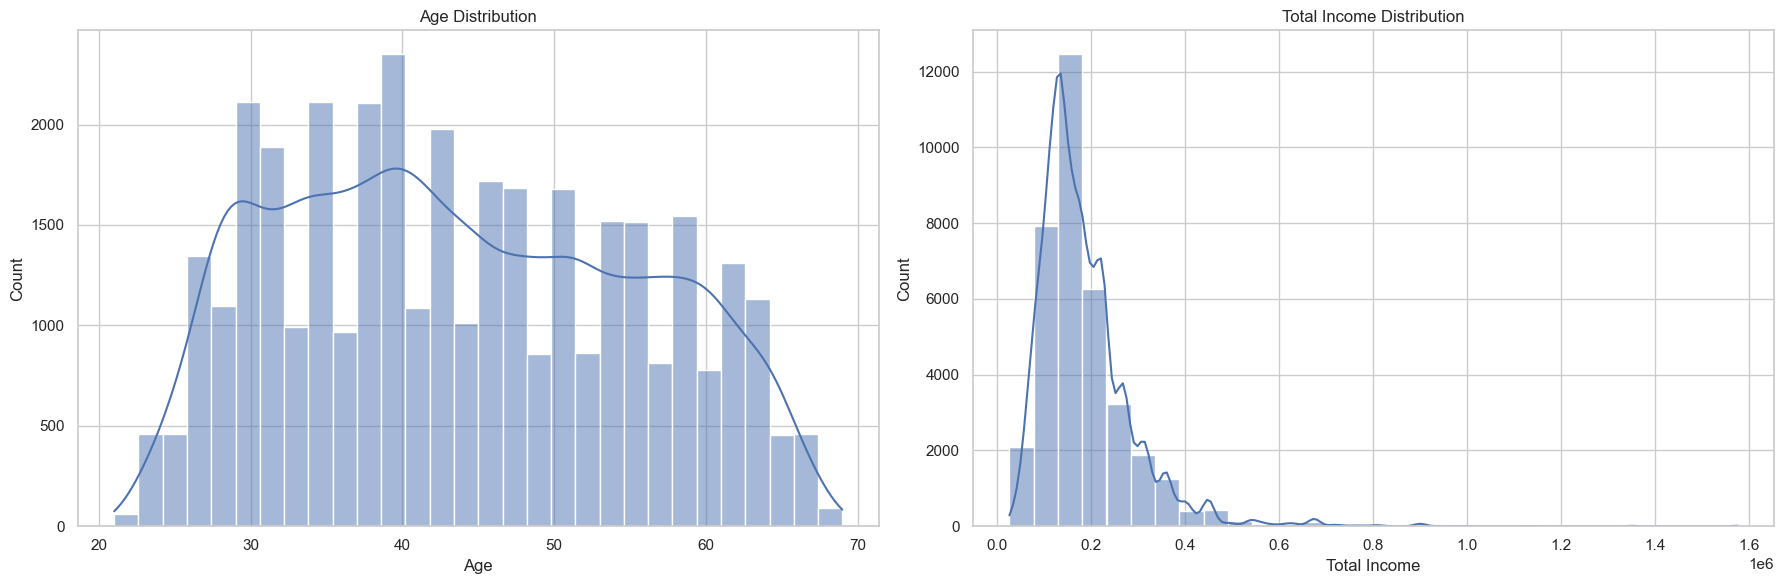

In [30]:
# Plotting distributions of some numerical variables
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Age distribution
sns.histplot(merged_df['AGE'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Total Income distribution
sns.histplot(merged_df['AMT_INCOME_TOTAL'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Total Income Distribution')
axes[1].set_xlabel('Total Income')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

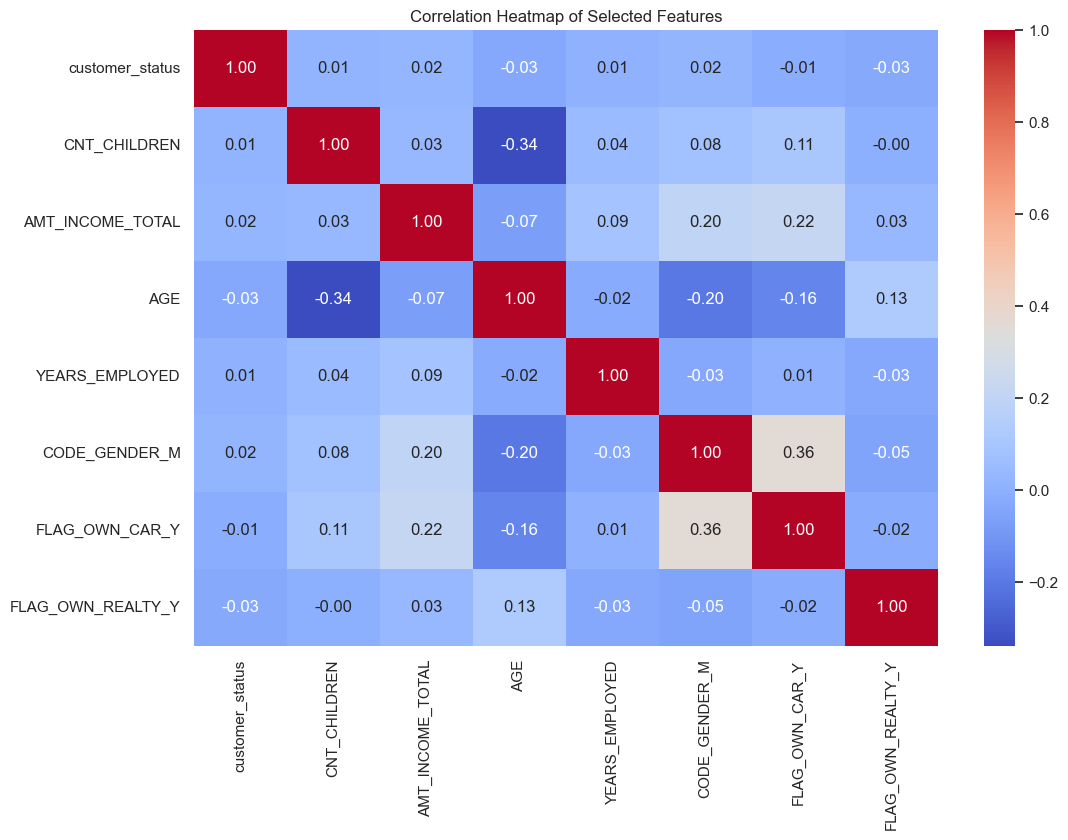

In [31]:
# Selecting a subset of key features for correlation analysis
selected_features = ['customer_status', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
                     'AGE', 'YEARS_EMPLOYED', 
                     'CODE_GENDER_M', 'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_Y']

# One-hot encoding for the selected categorical variables
merged_df_subset = pd.get_dummies(merged_df, columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])

# Keeping only the selected features
merged_df_subset = merged_df_subset[selected_features]

# Calculating the correlation matrix for the subset
corr_matrix_subset = merged_df_subset.corr()

# Plotting the heatmap for the subset
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [32]:
#merged_df["OCCUPATION_TYPE"].unique()

In [33]:
#merged_df.drop(columns=["OCCUPATION_TYPE"], inplace=True)

In [34]:
# Selecting categorical columns for encoding and numerical columns for scaling
categorical_cols = merged_df.select_dtypes(include=['object']).columns
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).drop('customer_status', axis=1).columns

# Preparing ColumnTransformer
ct = ColumnTransformer([
    ('one_hot_encoder', OneHotEncoder(sparse=False), categorical_cols),
    ('scaler', StandardScaler(), numerical_cols)
], remainder='passthrough')

# Applying ColumnTransformer to feature set
X = ct.fit_transform(merged_df.drop('customer_status', axis=1))

# Target variable
y = merged_df['customer_status']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to training set
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

/Users/kobe/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
# Create a Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model with the SMOTE-enhanced training data
lr.fit(X_train_smote, y_train_smote)

# Predict on the test set
lr_predictions = lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, lr_predictions))
print(confusion_matrix(y_test, lr_predictions))


              precision    recall  f1-score   support

           0       0.90      0.53      0.67      6458
           1       0.13      0.54      0.21       834

    accuracy                           0.53      7292
   macro avg       0.51      0.53      0.44      7292
weighted avg       0.81      0.53      0.61      7292

[[3416 3042]
 [ 387  447]]


/Users/kobe/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)

# Predict and evaluate
dt_predictions = dt.predict(X_test)
print(classification_report(y_test, dt_predictions))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6458
           1       0.39      0.43      0.41       834

    accuracy                           0.86      7292
   macro avg       0.66      0.67      0.67      7292
weighted avg       0.86      0.86      0.86      7292



In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
rf_predictions = rf.predict(X_test)
print(classification_report(y_test, rf_predictions))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6458
           1       0.40      0.44      0.42       834

    accuracy                           0.86      7292
   macro avg       0.67      0.68      0.67      7292
weighted avg       0.87      0.86      0.86      7292



In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_smote, y_train_smote)

# Predict and evaluate
gb_predictions = gb.predict(X_test)
print(classification_report(y_test, gb_predictions))


              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6458
           1       0.15      0.10      0.12       834

    accuracy                           0.83      7292
   macro avg       0.52      0.51      0.51      7292
weighted avg       0.80      0.83      0.82      7292



In [39]:
from xgboost import XGBClassifier

# Create and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)

# Predict and evaluate
xgb_predictions = xgb.predict(X_test)
print(classification_report(y_test, xgb_predictions))


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      6458
           1       0.34      0.23      0.27       834

    accuracy                           0.86      7292
   macro avg       0.62      0.58      0.60      7292
weighted avg       0.84      0.86      0.85      7292



In [40]:
# Create and train the model
nn = MLPClassifier(random_state=42)
nn.fit(X_train_smote, y_train_smote)

# Predict and evaluate
nn_predictions = nn.predict(X_test)
print(classification_report(y_test, nn_predictions))


              precision    recall  f1-score   support

           0       0.92      0.77      0.84      6458
           1       0.21      0.47      0.29       834

    accuracy                           0.73      7292
   macro avg       0.56      0.62      0.56      7292
weighted avg       0.84      0.73      0.77      7292



/Users/kobe/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


Epoch 1/20
1293/1293 [==============================] - 1s 689us/step - loss: 0.6479 - accuracy: 0.6307 - val_loss: 0.8661 - val_accuracy: 0.2015
Epoch 2/20
1293/1293 [==============================] - 1s 635us/step - loss: 0.6214 - accuracy: 0.6555 - val_loss: 0.9317 - val_accuracy: 0.2306
Epoch 3/20
1293/1293 [==============================] - 1s 623us/step - loss: 0.5956 - accuracy: 0.6799 - val_loss: 0.7947 - val_accuracy: 0.4017
Epoch 4/20
1293/1293 [==============================] - 1s 632us/step - loss: 0.5710 - accuracy: 0.7000 - val_loss: 0.8279 - val_accuracy: 0.4285
Epoch 5/20
1293/1293 [==============================] - 1s 624us/step - loss: 0.5515 - accuracy: 0.7132 - val_loss: 0.8291 - val_accuracy: 0.4276
Epoch 6/20
1293/1293 [==============================] - 1s 703us/step - loss: 0.5330 - accuracy: 0.7277 - val_loss: 0.7850 - val_accuracy: 0.4956
Epoch 7/20
1293/1293 [==============================] - 1s 677us/step - loss: 0.5185 - accuracy: 0.7390 - val_loss: 0.8488 -